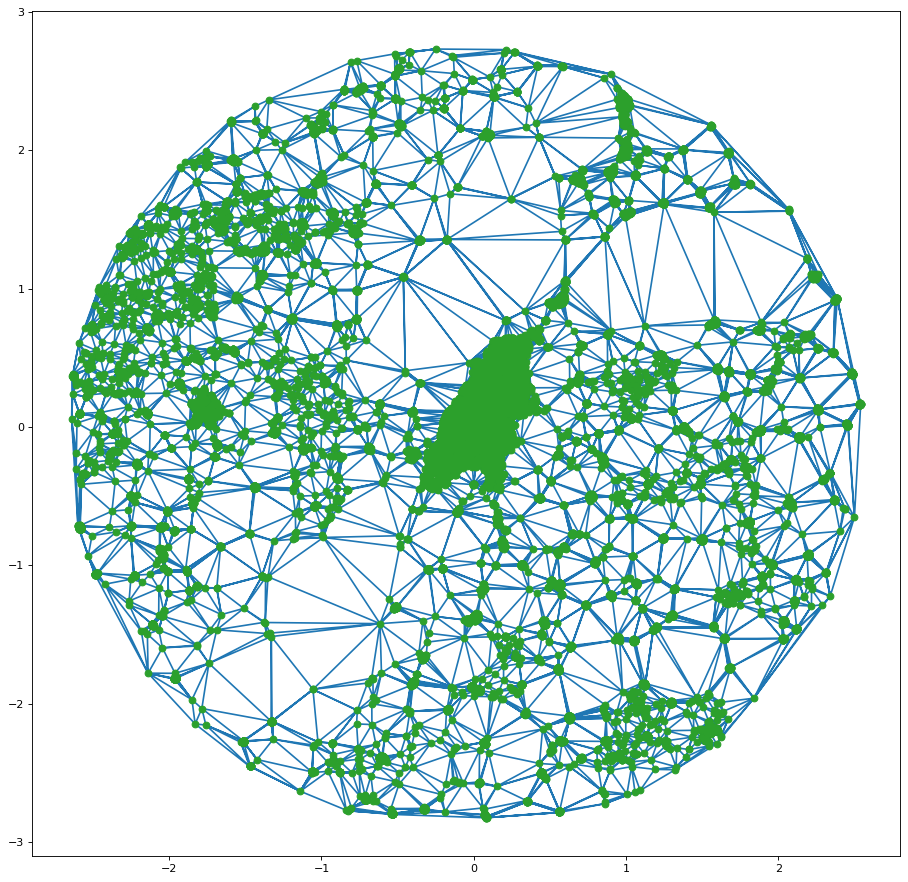

In [3]:
import geopandas as gp
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            #random_state=0)

#X = StandardScaler().fit_transform(X)

gdf = gp.read_file("/Users/thomasjhojlunddodd/documents/malcolm/SLE_KenemaRadius/SLE_KenemaRadius_OSMBuildings.geojson")
gdf["x"] = gdf.centroid.map(lambda p: p.x)
gdf["y"] = gdf.centroid.map(lambda p: p.y)
gdf1 = gdf[['x','y']]

X = gdf1.to_numpy()
points = gdf1.to_numpy()
X = StandardScaler().fit_transform(X)
points = StandardScaler().fit_transform(points)

from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=1, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [18]:
db = DBSCAN(eps=0.2, min_samples=1100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
      #% metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
      #% metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
      #% metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 20521


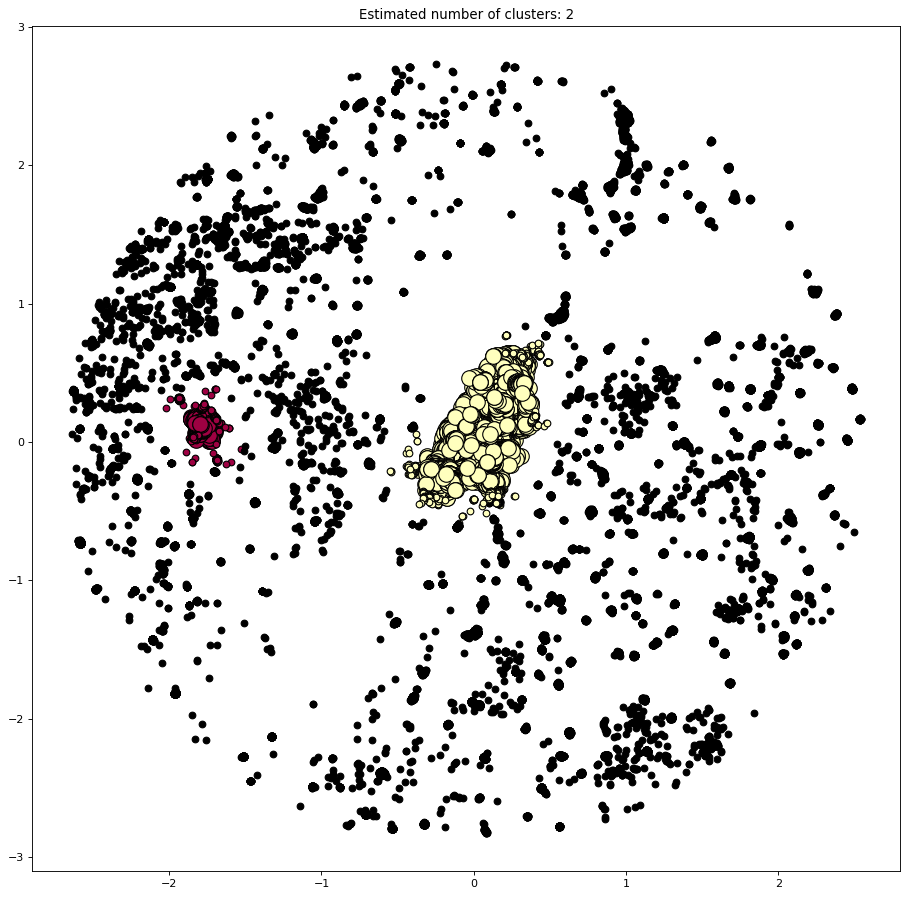

In [19]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
figure(num=1, figsize=(14, 14), dpi=80, facecolor='w', edgecolor='k')

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
